In [3]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


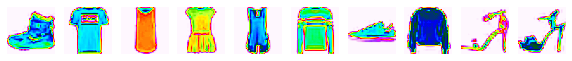

In [6]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 ** 2) # 이미지 픽셀 크기: 28x28

from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
import numpy as np

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
np.mean(scores['test_score'])

0.8192833333333333

In [9]:
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

print(f'train set 크기: {train_scaled.shape}, {train_target.shape}')
print('validation set 크기: {}, {}'.format(val_scaled.shape, val_target.shape))

train set 크기: (48000, 784), (48000,)
validation set 크기: (12000, 784), (12000,)


In [13]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
model = keras.Sequential(dense)

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 435us/step - loss: 0.6049 - accuracy: 0.7960
Epoch 2/5
1500/1500 [==============================] - 1s 428us/step - loss: 0.4791 - accuracy: 0.8388
Epoch 3/5
1500/1500 [==============================] - 1s 439us/step - loss: 0.4559 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 1s 442us/step - loss: 0.4445 - accuracy: 0.8517
Epoch 5/5
1500/1500 [==============================] - 1s 429us/step - loss: 0.4365 - accuracy: 0.8543


In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 393us/step - loss: 0.4561 - accuracy: 0.8487


[0.4560551345348358, 0.8486666679382324]